[View Website](https://cpresz.github.io/MLB-Stadium-Analysis/)

[View the Project on GitHub](https://github.com/cpresz/MLB-Stadium-Analysis)
# **MLB Analysis: Which Stadiums Provide the Biggest Offensive Advantage?**

Carly Presz and Evan Hendrickson

<font size='2'> November 14, 2022 </font>

<img src='https://fansided.com/wp-content/uploads/imagn-images/2018/08/18039579.jpeg' width='800'>

<font size='1'>
<br> Jeff Curry // USA TODAY Sports
</font>


## **About**

This project will investigate the offensive advantages provided by each MLB ballpark. Major League Baseball differs from other professional sports in that it feautures 30 uniquely designed stadiums. Whether it's short porches, Green Monsters, or even mile-high elevation, each ballpark has its own distinctive properties that impact the game, making some venues more "hitter-friendly" than others. So, which ballparks are the most condusive to offensive success? By analyzing batting statistics from the past 5 MLB seasons, we set out to determine which MLB stadiums are the most advantageous to hitters, and more importantly, why.

Our analysis will explore the following questions:
- Which MLB stadiums are the most/least favorable for hits?
- Which MLB stadiums are the most/least favorable for home runs?
- Which MLB stadiums are the most/least favorable for right-handed versus left-handed batters?
- What relationships exist between hitter-friendliness and stadium dimensions/weather/altitude?                              


## **Data Sources**
To complete our analysis, we collected 5 seasons worth of baseball statistics from various sources. Our primary data source was [Baseball Reference](https://www.baseball-reference.com/), which features player batting statistics from every MLB season including stats split by stadium. In addition to batting statistics, we also used stadium-specific data including dimensions and weather factors, obtained from [Kaggle](https://www.kaggle.com/). All datasets used in this project can be easily viewed in our GitHub repository [here](https://github.com/cpresz/MLB-Stadium-Analysis).

Need a refresher on baseball stats? Take a look at [MLB's Standard Stats Glossary](https://www.mlb.com/glossary/standard-stats).

## **ETL (Extraction, Transform, and Load)**
In the first block of code below, we will install the libraries needed throughout this project.



In [6]:
# Import necessary libraries 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html

### **Player Batting Data**
The below dataset was downloaded from [Baseball Reference](https://stathead.com/baseball/split_finder.cgi?request=1&match=season&order_by_asc=0&order_by=AB&year_min=2018&year_max=2022&split_1=locat%3Asite&split_total_comp=gt&class=player&type=b&age_min=0&age_max=99&season_start=1&season_end=-1&location=pob&locationMatch=is) and includes player statitistics in each ballpark for each of the last 5 seasons. For now, we want to focus on the basic offensive categories such as hits, home runs, and batting average. We will need to tidy this data by dropping unneccessary advanced hitting statistics and renaming some variables for clarity. To avoid confusion between stadium-specific stats and season totals, we'll rename some of the variables below. It is important to note that all of the statistics in this dataset are on a per-stadium basis. There are no season total stats included in this dataset - those will be brought in later.

In [8]:
park_stats = pd.read_csv('Stadium_Batting_Splits.csv');
park_stats.head()

,Rk,Player,Split,Year,G,AB,GS,PA,R,H,...,GDP,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,sOPS+,PlayerID
0,1,Whit Merrifield,KCR-KauffmanStad,2021,81,333,81,363,54,95,...,1,1,0,6,0,4,0.318,106.0,99,merriwh01
1,2,Whit Merrifield,KCR-KauffmanStad,2019,80,330,80,356,51,101,...,3,3,0,2,2,4,0.353,95.0,108,merriwh01
2,3,Marcus Semien,TEX-GlbLifeField,2022,80,324,80,353,47,68,...,2,0,0,1,0,6,0.224,72.0,74,semiema01
3,4,Trea Turner,WSN-Natls Park,2018,81,323,79,367,53,91,...,3,1,1,0,3,7,0.324,110.0,110,turnetr01
4,5,Ozzie Albies,ATL-Truist Pk,2021,79,319,79,348,60,89,...,0,2,0,4,2,2,0.304,116.0,135,albieoz01


In [9]:
# Drop unnecessary columns
park_stats = park_stats.drop(columns=['Rk', 'G', 'GS', 'PA', 'R', '2B', '3B',
                                      'RBI', 'SB', 'CS', 'BB', 'SO', 'OBP', 'SLG',
                                      'OPS', 'GDP', 'HBP', 'SH','SF', 'IBB',
                                      'ROE', 'BAbip', 'tOPS+', 'sOPS+'], axis=1)

# Rename these columns for the purpose of clarity 
park_stats = park_stats.rename(columns = {'Split':'Stadium', 'AB':'AB_stadium',
                                          'H':'H_stadium', 'HR':'HR_stadium',
                                          'BA':'BA_stadium', 'TB':'TB_stadium'})

A handful of stadiums in this dataset are neutral sites that are not the home ballpark of an MLB team, along with some that are no longer in use as they've been replaced within the past 5 years. We only care about the current 30 home stadiums, so let's remove everything else. Additionally, some stadiums have changed their name in the past 5 years. We do not want the old and new name to be treated as 2 separate stadiums, so let's convert all old stadium names to their new ones.

In [10]:
# Convert all old stadium names to new ones.
park_stats['Stadium'] = park_stats['Stadium'].replace({
    'MIL-Miller Pk':'MIL-Am Fam Field',
    'MIA-Marlins Pk':'MIA-loanDepot pk',
    'ATL-SunTrust Pk':'ATL-Truist Pk',
    'SFG-AT&T Pk':'SFG-Oracle Park',
    'SEA-Safeco Fld':'SEA-T-Mobile Pk',
    'OAK-Oakland Col':'OAK-Coliseum'})

# The 30 current MLB ballparks. Keep only these.
mlb_parks = ['KCR-KauffmanStad', 'TEX-GlbLifeField', 'WSN-Natls Park',
       'ATL-Truist Pk', 'CLE-Progressive','BAL-Camden Yards', 'TOR-Rogers Ctr',
       'LAD-Dodger Stad','CIN-GreatAmer BP', 'ARI-Chase Field','BOS-Fenway Pk',
       'SEA-T-Mobile Pk','MIN-Target Field', 'COL-Coors Fld','LAA-Angel Stad',
       'STL-Busch Stad 3','DET-Comerica Pk','NYM-Citi Field', 'SDP-Petco Pk',
       'CHW-Guaranteed','SFG-Oracle Park', 'PHI-CitizensBank', 'NYY-Yankee Stad3',
       'CHC-Wrigley Fld', 'HOU-MinuteMaidPk', 'MIL-Am Fam Field',
       'TBR-TropicanaFld', 'PIT-PNC Pk','OAK-Coliseum','MIA-loanDepot pk']

park_stats = park_stats[park_stats['Stadium'].isin(mlb_parks)]
park_stats.head()

,Player,Stadium,Year,AB_stadium,H_stadium,HR_stadium,BA_stadium,TB_stadium,PlayerID
0,Whit Merrifield,KCR-KauffmanStad,2021,333,95,5,0.285,135,merriwh01
1,Whit Merrifield,KCR-KauffmanStad,2019,330,101,4,0.306,144,merriwh01
2,Marcus Semien,TEX-GlbLifeField,2022,324,68,10,0.210,115,semiema01
3,Trea Turner,WSN-Natls Park,2018,323,91,10,0.282,139,turnetr01
4,Ozzie Albies,ATL-Truist Pk,2021,319,89,17,0.279,172,albieoz01


Now, we will bring in another dataset from [Baseball Reference](https://stathead.com/baseball/player-batting-season-finder.cgi) containing season total batting statistics for each player over the last 5 MLB seasons. Merging this will the stadium-specific data will allow us to calculate and compare "expected" versus "actual" hit values for each player in a given stadium.

Similar to above, we will  need to tidy this data by dropping unneccessary advanced hitting statistics and renaming some variables for clarity.

In [ ]:
season_totals = pd.read_csv('Season_Total_Stats.csv');

# Drop unnecessary columns
season_totals = season_totals.drop(columns=['Rk', 'G', 'GS', 'PA', 'R', '2B', '3B',
                                      'RBI', 'SB', 'CS', 'BB', 'SO', 'OBP', 'SLG',
                                      'OPS', 'GDP', 'HBP', 'SH','SF', 'IBB',
                                      'ROE', 'BAbip', 'tOPS+', 'sOPS+'], axis=1)

# Rename these columns for the purpose of clarity 
season_totals = season_totals.rename(columns = {'AB':'AB_season', 'H':'H_season',
                                                'HR':'HR_season', 'BA':'BA_season',
                                                'TB':'TB_season'})
season_totals.head()

,Player,Year,AB_season,H_season,HR_season,BA_season,TB_season,PlayerID
0,A.J. Cole,2018,3,1,1,0.333,4,coleaj01
1,A.J. Ellis,2018,151,41,1,0.272,52,ellisaj01
2,A.J. Minter,2021,1,0,0,0.000,0,minteaj01
3,Aaron Altherr,2018,243,44,8,0.181,81,altheaa01
4,Aaron Altherr,2019,61,5,1,0.082,10,altheaa01


Now that this dataset has been cleaned, let's merge it with our stadium-specific data to get one final dataset with both stadium and season total stats for each player. 

In [ ]:
# Merge the stadium and season-total stats
player_stats = park_stats.merge(season_totals, on=["Year", "Player", "PlayerID"], how="left")
player_stats.head()

,Player,Stadium,Year,AB_stadium,H_stadium,HR_stadium,BA_stadium,TB_stadium,PlayerID,AB_season,H_season,HR_season,BA_season,TB_season
0,Whit Merrifield,KCR-KauffmanStad,2021,333,95,5,0.285,135,merriwh01,664,184,10,0.277,262
1,Whit Merrifield,KCR-KauffmanStad,2019,330,101,4,0.306,144,merriwh01,681,206,16,0.303,315
2,Marcus Semien,TEX-GlbLifeField,2022,324,68,10,0.210,115,semiema01,657,163,26,0.248,282
3,Trea Turner,WSN-Natls Park,2018,323,91,10,0.282,139,turnetr01,664,180,19,0.271,276
4,Ozzie Albies,ATL-Truist Pk,2021,319,89,17,0.279,172,albieoz01,629,163,30,0.259,307


Now, we are just missing the "Bats" variable, which indicates whether a player bats right-handed, left-handed, or is a switch hitter. We have again retrieved this data from Baseball Reference. Let's load it in and merge it with our existing dataframe.

In [ ]:
bats = pd.read_csv('Bats.csv');
bats.head()

,Player,PlayerID,Bats
0,Whit Merrifield,merriwh01,R
1,Trea Turner,turnetr01,R
2,Marcus Semien,semiema01,R
3,Bo Bichette,bichebo01,R
4,Dansby Swanson,swansda01,R


In [ ]:
# Merge "bats" with player batting stats
player_stats = player_stats.merge(bats, on=["Player", "PlayerID"], how="left")

Below we will check that all dtypes are correct and display our final, cleaned dataframe containing player batting statistics.

In [ ]:
# All dtypes appear to be set properly
display(player_stats.dtypes)
display(player_stats.head())

Player         object
Stadium        object
Year            int64
AB_stadium      int64
H_stadium       int64
HR_stadium      int64
BA_stadium    float64
TB_stadium      int64
PlayerID       object
AB_season       int64
H_season        int64
HR_season       int64
BA_season     float64
TB_season       int64
Bats           object
dtype: object

,Player,Stadium,Year,AB_stadium,H_stadium,HR_stadium,BA_stadium,TB_stadium,PlayerID,AB_season,H_season,HR_season,BA_season,TB_season,Bats
0,Whit Merrifield,KCR-KauffmanStad,2021,333,95,5,0.285,135,merriwh01,664,184,10,0.277,262,R
1,Whit Merrifield,KCR-KauffmanStad,2019,330,101,4,0.306,144,merriwh01,681,206,16,0.303,315,R
2,Marcus Semien,TEX-GlbLifeField,2022,324,68,10,0.210,115,semiema01,657,163,26,0.248,282,R
3,Trea Turner,WSN-Natls Park,2018,323,91,10,0.282,139,turnetr01,664,180,19,0.271,276,R
4,Ozzie Albies,ATL-Truist Pk,2021,319,89,17,0.279,172,albieoz01,629,163,30,0.259,307,S


### **Stadium Data: Dimensions & Weather**
Now we will load in a dataset from [Seamheads Ballpark Database](https://www.seamheads.com/ballparks/) containing stadium dimensions, altitude, and square footage of fair and foul territory.

In [ ]:
dimensions = pd.read_csv('Stadium_Dimensions.csv')

In [ ]:
# All dtypes appear to be set properly
display(dimensions.dtypes)
display(dimensions.head())

Stadium                            object
Fair Territory (1,000 sq. ft.)    float64
Foul Territory (1,000 sq. ft.)    float64
LF Fence Height                     int64
CF Fence Height                     int64
Altitude                            int64
RF Fence Height                     int64
CF Orientation                     object
LF Distance                         int64
LCF Distance                        int64
CF Distance                         int64
RCF Distance                        int64
RF Distance                         int64
dtype: object

,Stadium,"Fair Territory (1,000 sq. ft.)","Foul Territory (1,000 sq. ft.)",LF Fence Height,CF Fence Height,Altitude,RF Fence Height,CF Orientation,LF Distance,LCF Distance,CF Distance,RCF Distance,RF Distance
0,ARI-Chase Field,114.2,25.5,8,25,1059,8,N,330,376,407,376,335
1,ATL-Truist Pk,109.3,22.3,6,8,981,16,SSE,335,385,400,375,325
2,BAL-Camden Yards,108.1,23.6,7,7,35,21,NNE,333,364,400,373,318
3,BOS-Fenway Pk,105.5,18.1,37,18,16,5,NE,310,335,390,378,302
4,CHC-Wrigley Fld,107.8,18.6,16,11,599,16,NE,355,352,395,368,353


This dataset is already tidy and ready to be analyzed, so now we will load in game weather data extracted from [Kaggle](https://www.kaggle.com/datasets/josephvm/mlb-game-data?select=games.csv). We will need to clean this dataset by dropping unnecessary columns and manipulating some variables.

In [ ]:
game_weather = pd.read_csv('Weather.csv')
game_weather.head()

,attendance,date,start_time,Stadium,weather,wind
0,38450,10/1/2018,12:05 PM,CHC-Wrigley Fld,"65 degrees, overcast","6 mph, R to L"
1,47816,10/1/2018,1:09 PM,LAD-Dodger Stad,"90 degrees, sunny","6 mph, Out to CF"
2,24916,9/30/2018,3:09 PM,BAL-Camden Yards,"77 degrees, sunny","1 mph, R to L"
3,36201,9/30/2018,3:07 PM,BOS-Fenway Pk,"68 degrees, partly cloudy","10 mph, Out to RF"
4,39275,9/30/2018,2:22 PM,CHC-Wrigley Fld,"60 degrees, cloudy","2 mph, Varies"


We can see above that the "weather" and "wind" variables will need to be split into multiple columns, and we will need to extract the numerical values so that these variables can be manipulated mathematically. Additionally, there are some stadiums in this dataset outside of the 30 that we care about. Similar to before, we'll keep MLB's 30 home stadiums and remove everything else. Because this data is on a per-game basis, we'll also need to create some new variables to represent total averages or percentages over the course of multiple seasons. These new variables will include average temperature at game time, average wind speed, and percentage of games with precipitation.

In [ ]:
# Only keep data from 30 MLB parks
game_weather = game_weather[game_weather['Stadium'].isin(mlb_parks)]

# Create temperature and sky variables
game_weather[['temp', 'sky']] = game_weather['weather'].str.split(', ', expand=True)
game_weather[['wind speed', 'wind dir']] = game_weather['wind'].str.split(', ', expand=True)

# Get temp and wind speed as integers
game_weather['temp'] = game_weather['temp'].str.split(' ').str[0].astype(int)
game_weather['wind speed'] = game_weather['wind speed'].str.split(' ').str[0].astype(int)

# Drop unnecessary columns
game_weather = game_weather.drop(columns=['weather', 'wind', 'attendance',
                                          'date', 'start_time'], axis=1)
game_weather.head()

,Stadium,temp,sky,wind speed,wind dir
0,CHC-Wrigley Fld,65,overcast,6,R to L
1,LAD-Dodger Stad,90,sunny,6,Out to CF
2,BAL-Camden Yards,77,sunny,1,R to L
3,BOS-Fenway Pk,68,partly cloudy,10,Out to RF
4,CHC-Wrigley Fld,60,cloudy,2,Varies


Next, we'll create 7 new variables: Average Temperature, Average Wind Speed, % Wind Blowing In, % Wind Blowing Out, % Precipitation, % Sunny, and % Games with Roof Closed. Note that some stadiums have retractable roofs and Tropicana Field has a fixed roof meaning that games are always played indoors. We create this variable, % Roof Closed, so that we can explore whether this effects player performance.

In [ ]:
# Group by stadium
grouped = game_weather.groupby('Stadium')

# Calculate percentage of weather conditions
sky_percent = (grouped['sky'].value_counts(normalize=True)*100).unstack().fillna(0)
sky_percent['% precip'] = sky_percent.loc[:,'drizzle'] + sky_percent.loc[:,'rain'] + sky_percent.loc[:,'snow']
sky_percent['% inside'] = sky_percent.loc[:,'dome'] + sky_percent.loc[:,'roof closed']

# Calculate percentage of wind conditions
wind_percent = (grouped['wind dir'].value_counts(normalize=True)*100).unstack().fillna(0)
wind_percent['% wind in'] = wind_percent.loc[:,'In from CF'] + wind_percent.loc[:,'In from LF'] + wind_percent.loc[:,'In from RF']
wind_percent['% wind out'] = wind_percent.loc[:,'Out to CF'] + wind_percent.loc[:,'Out to LF'] + wind_percent.loc[:,'Out to RF']

# Store final weather variables in a new dataframe
weather_avg = pd.DataFrame({'Avg Temp':grouped['temp'].mean().values,
                   'Avg Wind Speed':grouped['wind speed'].mean().values, '% Precip':sky_percent.loc[:,'% precip'],
                   '% Sun':sky_percent.loc[:,'sunny'], '% Roof Closed':sky_percent.loc[:,'% inside'],
                   '% Wind In':wind_percent.loc[:,'% wind in'], '% Wind Out':wind_percent.loc[:,'% wind out']})

# Check dtypes and display final dataframe
display(weather_avg.dtypes)
display(weather_avg.head())

Avg Temp          float64
Avg Wind Speed    float64
% Precip          float64
% Sun             float64
% Roof Closed     float64
% Wind In         float64
% Wind Out        float64
dtype: object

,Avg Temp,Avg Wind Speed,% Precip,% Sun,% Roof Closed,% Wind In,% Wind Out
Stadium,,,,,,,
ARI-Chase Field,80.891975,2.700617,0.000000,2.469136,67.592593,4.629630,8.333333
ATL-Truist Pk,79.513932,7.668731,1.857585,6.191950,0.000000,14.860681,20.433437
BAL-Camden Yards,75.710280,4.984424,3.426791,6.542056,0.000000,21.806854,44.236760
BOS-Fenway Pk,69.182099,11.623457,1.851852,10.185185,0.000000,35.493827,42.901235
CHC-Wrigley Fld,69.744615,9.550769,2.153846,18.153846,0.000000,43.076923,24.307692


Our weather data is now tidy. In one final step, we will merge our dimensions and weather data into one final dataframe containing all of our stadium statistics. The final dataframe is displayed below.

In [ ]:
stadium_data = weather_avg.merge(dimensions, on='Stadium', how='inner')
stadium_data.set_index('Stadium', inplace=True)
stadium_data.head()

,Avg Temp,Avg Wind Speed,% Precip,% Sun,% Roof Closed,% Wind In,% Wind Out,"Fair Territory (1,000 sq. ft.)","Foul Territory (1,000 sq. ft.)",LF Fence Height,CF Fence Height,Altitude,RF Fence Height,CF Orientation,LF Distance,LCF Distance,CF Distance,RCF Distance,RF Distance
Stadium,,,,,,,,,,,,,,,,,,,
ARI-Chase Field,80.891975,2.700617,0.000000,2.469136,67.592593,4.629630,8.333333,114.2,25.5,8,25,1059,8,N,330,376,407,376,335
ATL-Truist Pk,79.513932,7.668731,1.857585,6.191950,0.000000,14.860681,20.433437,109.3,22.3,6,8,981,16,SSE,335,385,400,375,325
BAL-Camden Yards,75.710280,4.984424,3.426791,6.542056,0.000000,21.806854,44.236760,108.1,23.6,7,7,35,21,NNE,333,364,400,373,318
BOS-Fenway Pk,69.182099,11.623457,1.851852,10.185185,0.000000,35.493827,42.901235,105.5,18.1,37,18,16,5,NE,310,335,390,378,302
CHC-Wrigley Fld,69.744615,9.550769,2.153846,18.153846,0.000000,43.076923,24.307692,107.8,18.6,16,11,599,16,NE,355,352,395,368,353


## **EDA (Exploratory Data Analysis)**

Now that our data is tidy, we can do some EDA. When analyzing the effects of each ballpark, we do not want to simply look at overall statistical averages in each ballpark, because it is possible that baseball's best hitters have played more frequently in some stadiums than others. This could skew our results in favor of the stadiums that have hosted the highest-quality hitters over the past 5 seasons. The process we used to control for this is explained below. We will start by analyzing one of baseball's most universal offensive statistics - hits.

## **Hits**
Let's explore which stadiums provide the biggest offensive advantage in terms of hits. To control for the quality of hitters who have hit in each ballpark, we will use players' season total batting averages to calculate an "expected" hit value for each stadium, and compare this to their "actual" hit value.

For example, let's say a player had a batting average of .250 on the season. If that player took 100 at-bats in Yankee Stadium that season, we would *expect* that he had 25 hits. But, how many hits in Yankee Stadium did he *actually* have? This difference between expected and actual hits will tell us whether a player over- or underperformed in each stadium. By summing up these values for each stadium and controlling for the total number of at-bats taken in the stadium, we are left with a value that is crucial to our analysis - average hits above expected.

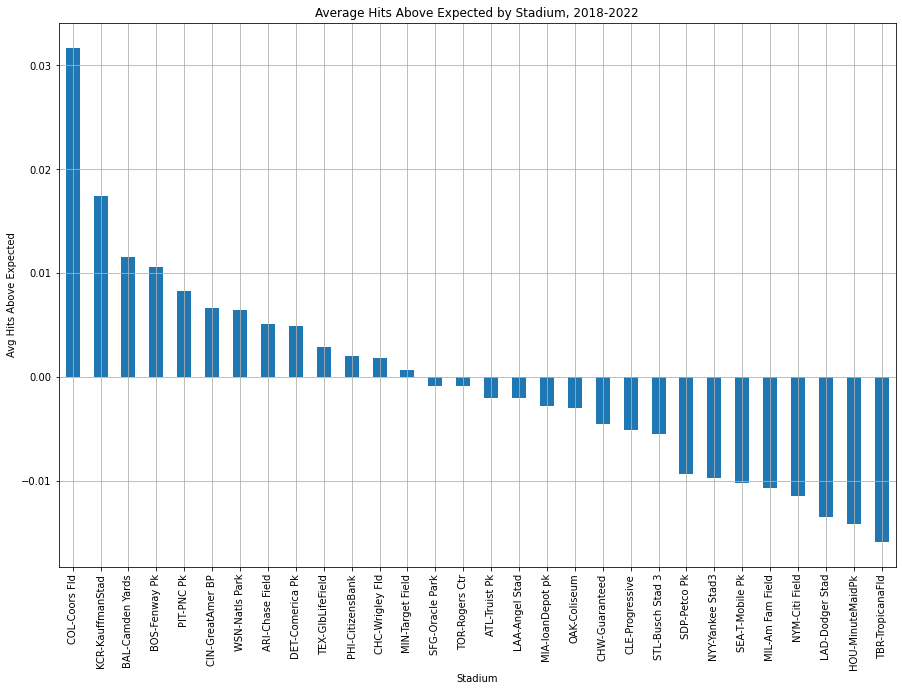

In [ ]:
# expected hits in a stadium = season batting avg * at-bats in the stadium
player_stats['expected_hits'] = player_stats['BA_season']*player_stats['AB_stadium']

# hits above expected = actual hits - expected hits
player_stats['hits_above_expected'] = player_stats['H_stadium']-player_stats['expected_hits']

# sum the hits above expected for each stadium, control for total # of ABs
stad = player_stats.groupby('Stadium')
avg_hits_above_exp = (stad['hits_above_expected'].sum()/stad['AB_stadium'].sum()).sort_values(ascending=False)

# plot bar graph
avg_hits_above_exp.plot.bar(ylabel='Avg Hits Above Expected', grid=True, title = 'Average Hits Above Expected by Stadium, 2018-2022',figsize=(15, 10));

The above graph shows the average hits above expected (per at-bat) in each stadium. The stadiums with bars in the negative direction are stadiums in which players tend to underperform, while stadiums with positive values are those in which players typically outperform their season averages. We can see that the two most neutral stadiums are Target Field and Oracle Park. These are stadiums in which players perform closest to their expectations in terms of hits, with almost no separation between expected and actual hits on average. 

Shown below are two dataframes displaying the best and worst stadiums in terms of hits above expected.

In [ ]:
# top 5: hits above expected
top5 = pd.DataFrame({'Stadium':avg_hits_above_exp[0:5].index,
                     'Avg Hits Above Expected':avg_hits_above_exp[0:5].values})

# botton 5: hits above expected
bot5 = pd.DataFrame({'Stadium':avg_hits_above_exp.sort_values(ascending=True)[0:5].index,
                     'Avg Hits Above Expected':avg_hits_above_exp.sort_values(ascending=True)[0:5].values})

top5.index += 1
bot5.index += 1

# display dataframes inline
top5_styler = top5.style.set_table_attributes("style='display:inline'").set_caption('Best Stadiums: Hits')
bot5_styler = bot5.style.set_table_attributes("style='display:inline'").set_caption('Worst Stadiums: Hits')
space = "\xa0" * 10
display_html(top5_styler._repr_html_() + space  + bot5_styler._repr_html_(), raw=True)

,Stadium,Avg Hits Above Expected
1,COL-Coors Fld,0.031712
2,KCR-KauffmanStad,0.017398
3,BAL-Camden Yards,0.011565
4,BOS-Fenway Pk,0.010625
5,PIT-PNC Pk,0.008321
,Stadium,Avg Hits Above Expected
1,TBR-TropicanaFld,-0.015870
2,HOU-MinuteMaidPk,-0.014195
3,LAD-Dodger Stad,-0.013440
4,NYM-Citi Field,-0.011491


Coors Field leads the pack by a comfortable margin in average hits above expected, followed by Kauffman Stadium and Camden Yards. Coming in last is Tropicana Field, which places hitters at a disadvantage of -.016 hits per at-bat. It is interesting to note that the Houston Astros and Los Angeles Dodgers, two teams that have been considered the offensive juggernauts of Major League Baseball over the past 5 seasons, both play in unfavorable hitting environments.

Now, let's take a look at the correlations between hits above expected and our dimensions and weather data.

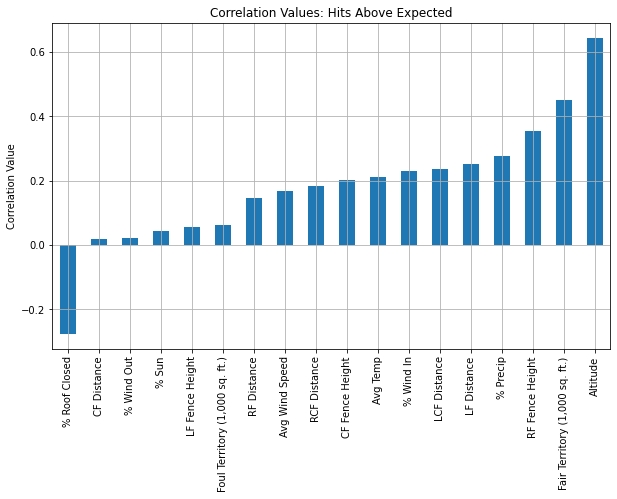

In [ ]:
df = pd.DataFrame({'Stadium':avg_hits_above_exp.index,
                   'Avg Hits Above Expected':avg_hits_above_exp.values}).merge(stadium_data, on='Stadium')
hits_corr = df.corr().iloc[0].drop('Avg Hits Above Expected').sort_values()
hits_corr.plot.bar(ylabel='Correlation Value', grid=True, title = 'Correlation Values: Hits Above Expected',figsize=(10, 6));

This graph shows us that high altitude and square footage of fair territory are our best indicators of a hitter-friendly environment. We predicted that some of these variables would be stronger indicators, but it makes a lot of sense that altitude and fair territory have significant positive correlations with hitter-friendliness. We have displayed these relationships in the scatter plots below.

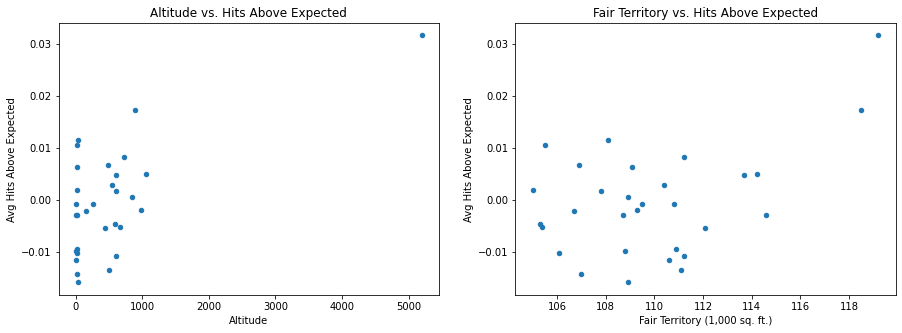

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
fig1 = df.plot.scatter(ax=ax[0], x='Altitude', y='Avg Hits Above Expected', title='Altitude vs. Hits Above Expected')
fig2 = df.plot.scatter(ax=ax[1], x='Fair Territory (1,000 sq. ft.)', y='Avg Hits Above Expected', title='Fair Territory vs. Hits Above Expected');

## **Hits: Righties vs. Lefties**
Now, let's compare how right- and left-handed hitters fare in each ballpark in terms of hits. First, we'll take a look at the distribution of hits above expected for both righties and lefties. It is important to note that we have omitted data for switch-hitters in this analysis.



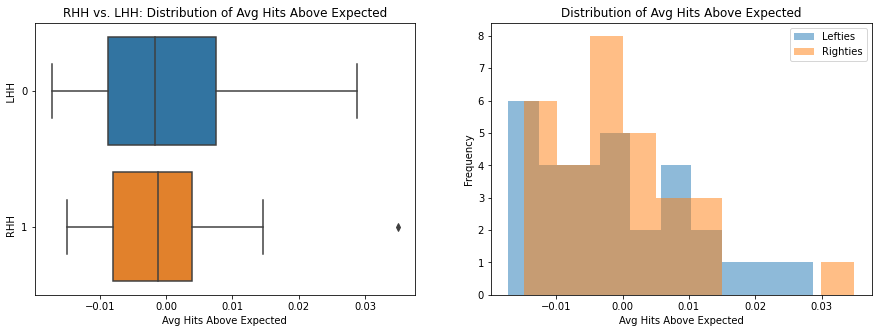

In [ ]:
df = player_stats.groupby(['Stadium', 'Bats'])
avg_hits_above_exp = (df['hits_above_expected'].sum()/df['AB_stadium'].sum()).sort_values(ascending=False)

# distinguish between lefties and righties
RHH_hits_above_exp = avg_hits_above_exp.loc[:,'R']
LHH_hits_above_exp = avg_hits_above_exp.loc[:,'L']

fig, ax = plt.subplots(1,2, figsize=(15, 5))

# box plot
sns.boxplot(data=[LHH_hits_above_exp, RHH_hits_above_exp], orient='h', ax=ax[0]).set(
    xlabel = 'Avg Hits Above Expected',
    ylabel = 'RHH                                    LHH',
    title = 'RHH vs. LHH: Distribution of Avg Hits Above Expected');

# histogram
LHH_hits_above_exp.plot.hist(ax=ax[1], alpha=0.5, label='Lefties', legend=True)
RHH_hits_above_exp.plot.hist(ax=ax[1], alpha=0.5, label='Righties', legend=True)
ax[1].set(title='Distribution of Avg Hits Above Expected', xlabel='Avg Hits Above Expected');

Based on the box plot above, hit-friendliness is more widely distributed for left-handed hitters, while data for righties is more uniformly distributed with the exception of one large outlier. Both distributions are slightly right-skewed with mean values around 0.

Let's take a closer look at hits above expected values for righties and lefties in each stadium.

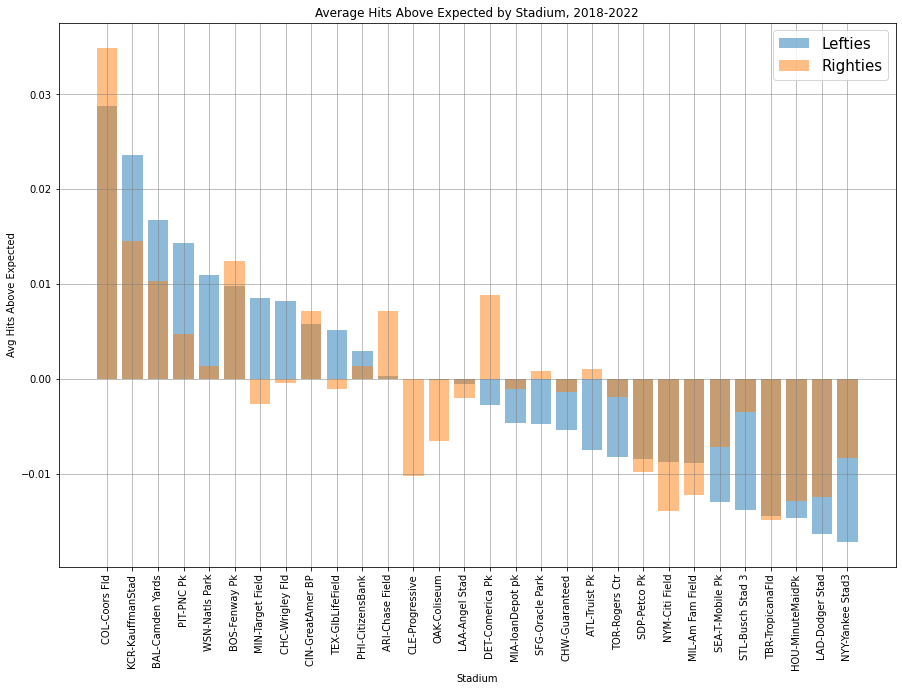

In [ ]:
# plot avg hits above expected, overlay RHH and LHH
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()
ax.bar(x=LHH_hits_above_exp.index,height=LHH_hits_above_exp.values, alpha=0.5, label='Lefties')
ax.bar(x=RHH_hits_above_exp.index,height=RHH_hits_above_exp.values, alpha=0.5, label='Righties')
ax.grid(color='gray', linewidth=0.5)
plt.xlabel('Stadium'); plt.ylabel('Avg Hits Above Expected')
plt.title('Average Hits Above Expected by Stadium, 2018-2022')
plt.xticks(rotation=90)
plt.legend(fontsize=15);

The players with the greatest advantage in terms of hits are right-handed batters at Coors Field, while lefties at Yankee Stadium perform the worst. Most stadiums have either a universally positive or negative effect on hitting, but some parks simultaneously help righties while hurting lefties, or vice versa. Both Progressive Field and the Oakland Coliseum are completely neutral for left-handed hitters on average, but place righties at a noticeable disadvantage.

Let's see which stadium has the biggest performance gap between right- and left-handed batters based on hits.

In [ ]:
(LHH_hits_above_exp - RHH_hits_above_exp).abs().idxmax()

'DET-Comerica Pk'

The largest performance gap belongs to Detroit's Comerica Park, which boasts favorable hitting conditions for righties, but not for lefties. 

What about the smallest performace gap?

In [ ]:
(LHH_hits_above_exp - RHH_hits_above_exp).abs().idxmin()

'TBR-TropicanaFld'

Tropicana field has nearly identical outcomes for right-handed and left-handed hitters, and neither of them are positive. So far, this is our most universally unfavorable park for hitters!

## **Home Runs**
Now, we will move on to analyze one of baseball's most exciting occurrences - the home run. Which stadium is the most home run-friendly? Let's find out.

<img src='https://yanksgoyard.com/wp-content/uploads/getty-images/2022/05/1240431748.jpeg' width='800'>

<font size='1'>
<br> Cole Burston // Getty Images
</font>



Once again, we will need to control for the quality of hitters that hit in each stadium. It is probable that baseball's best home run hitters have played more frequently in some stadiums than others, and this could skew our results. Taking a similar approach as before, we will first use players' total home runs to calculate a home runs per at-bat variable (the home run equivalent of batting average). For each player, we will use this to calculate an "expected" home run value in each stadium, and compare this to their "actual" home run value. We will sum these values up for each stadium, control for the number of at-bats taken, and arrive at yet another crucial statistic in our analysis - average home runs above expected.

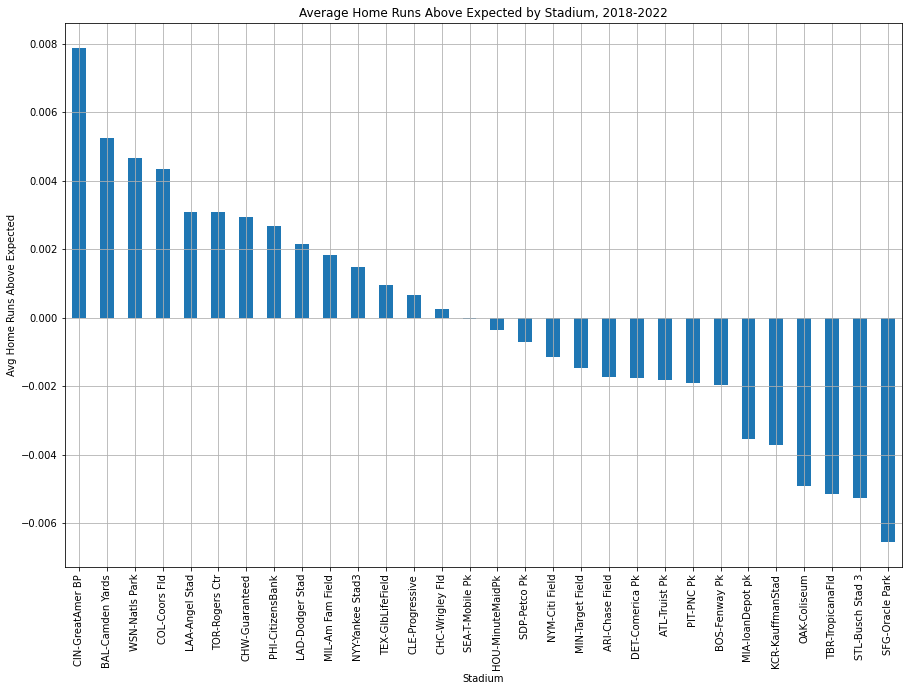

In [ ]:
# home run average = season total HRs / season total ABs
player_stats['HR_avg'] = player_stats['HR_season']/player_stats['AB_season']

# expected HRs in a stadium = season HR avg * ABs in the stadium
player_stats['expected_HR'] = player_stats['HR_avg']*player_stats['AB_stadium']

# HRs above expected = actual HRs - expected HRs
player_stats['HR_above_expected'] = player_stats['HR_stadium']-player_stats['expected_HR']

# sum the HRs above expected for each stadium,  control for total # of ABs
stad = player_stats.groupby('Stadium')
avg_HR_above_exp = (stad['HR_above_expected'].sum()/stad['AB_stadium'].sum()).sort_values(ascending=False)

# plot bar graph
avg_HR_above_exp.plot.bar(ylabel='Avg Home Runs Above Expected', grid=True,
                          title = 'Average Home Runs Above Expected by Stadium, 2018-2022',
                          figsize=(15, 10));

The positive bars on the graph above indicate favorable home run environments, while bars in the negative direction represent unfavorable environments, or those in which players perform worse than average in terms of home runs. We can see that the Reds' Great American Ballpark leads by a considerable margin, while T-Mobile Park in Seattle appears to be a completely neutral environment. 

Shown below are two dataframes displaying the best and worst home run-hitting stadiums.

In [ ]:
# top 5: HRs above expected
top5 = pd.DataFrame({'Stadium':avg_HR_above_exp[0:5].index,
                     'Avg HRs Above Expected':avg_HR_above_exp[0:5].values})

# botton 5: HRs above expected
bot5 = pd.DataFrame({'Stadium':avg_HR_above_exp.sort_values(ascending=True)[0:5].index,
                     'Avg HRs Above Expected':avg_HR_above_exp.sort_values(ascending=True)[0:5].values})

top5.index += 1
bot5.index += 1

# display dataframes inline
top5_styler = top5.style.set_table_attributes("style='display:inline'").set_caption('Best Home Run Environments')
bot5_styler = bot5.style.set_table_attributes("style='display:inline'").set_caption('Worst Home Run Environments')
space = "\xa0" * 10
display_html(top5_styler._repr_html_() + space  + bot5_styler._repr_html_(), raw=True)

,Stadium,Avg HRs Above Expected
1,CIN-GreatAmer BP,0.007884
2,BAL-Camden Yards,0.005234
3,WSN-Natls Park,0.004655
4,COL-Coors Fld,0.004344
5,LAA-Angel Stad,0.003096
,Stadium,Avg HRs Above Expected
1,SFG-Oracle Park,-0.006549
2,STL-Busch Stad 3,-0.005257
3,TBR-TropicanaFld,-0.005161
4,OAK-Coliseum,-0.004931


Cincinatti's Great American Ballpark provides hitters with the greatest statistical advantage in terms of home runs, while the Giants' Oracle Park is baseball's least favorable home run environment. Interestingly, Kauffman Stadium, our 2nd ranked ballpark in terms of hit-friendliness, is among the worst for home runs. We also notice that Tropicana Field is once again at the back of the pack, among the least favorable hitting environments for both hits and home runs.

Now, let's take a look at the correlations between home runs above expected and our dimensions and weather data.

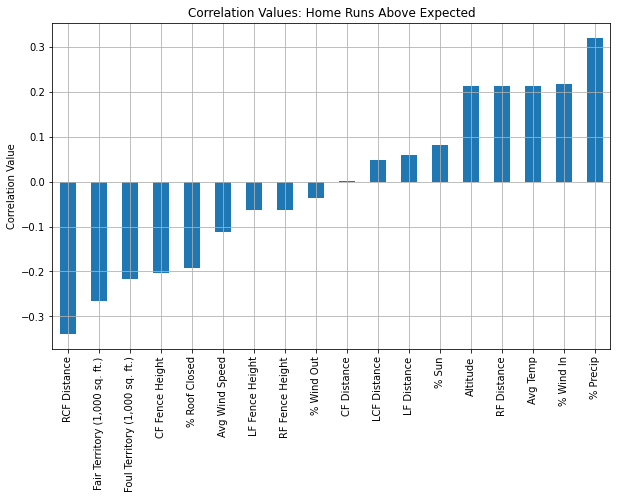

In [ ]:
df = pd.DataFrame({'Stadium':avg_HR_above_exp.index,
                   'Avg HR Above Expected':avg_HR_above_exp.values}).merge(stadium_data, on='Stadium')
hits_corr = df.corr().iloc[0].drop('Avg HR Above Expected').sort_values()
hits_corr.plot.bar(ylabel='Correlation Value', grid=True, title = 'Correlation Values: Home Runs Above Expected',figsize=(10, 6));

Again, we expected these variables to be much stronger indicators of home run-friendliness. Our highest corrlation value belongs to Right-Center Field (RCF) Distance, which is negatively correlated with home runs above expected. This relationship is displayed in the scatter plot below.

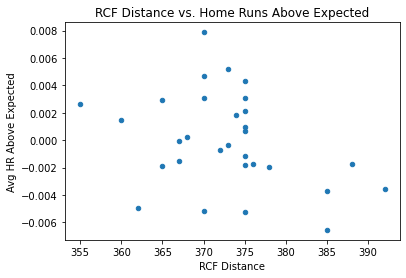

In [ ]:
df.plot.scatter(x='RCF Distance', y='Avg HR Above Expected', title='RCF Distance vs. Home Runs Above Expected');

## **Home Runs: Righties vs. Lefties**
Now, we'll compare how right- and left-handed hitters fare in each ballpark in terms of home runs. First, we'll take a look at the distribution of home runs above expected for both righties and lefties. Once again we will leave out data for switch-hitters.

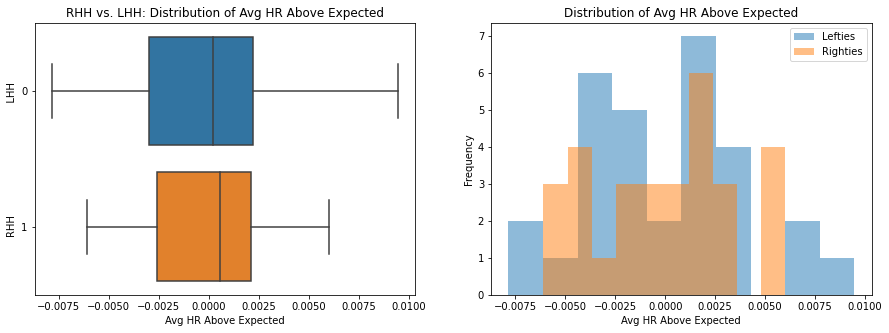

In [ ]:
df = player_stats.groupby(['Stadium', 'Bats'])
HR_above_exp = (df['HR_above_expected'].sum()/df['AB_stadium'].sum()).sort_values(ascending=False)

RHH_HR_above_exp = HR_above_exp.loc[:,'R']
LHH_HR_above_exp = HR_above_exp.loc[:,'L']

fig, ax = plt.subplots(1,2, figsize=(15, 5))

# box plot
sns.boxplot(data=[LHH_HR_above_exp, RHH_HR_above_exp], orient='h', ax=ax[0]).set(
    xlabel = 'Avg HR Above Expected',
    ylabel = 'RHH                                    LHH',
    title = 'RHH vs. LHH: Distribution of Avg HR Above Expected');

# histogram
LHH_HR_above_exp.plot.hist(ax=ax[1], alpha=0.5, label='Lefties', legend=True)
RHH_HR_above_exp.plot.hist(ax=ax[1], alpha=0.5, label='Righties', legend=True)
ax[1].set(title='Distribution of Avg HR Above Expected', xlabel='Avg HR Above Expected');

The distribution of home runs above expected is pretty similar for both righties and lefties. Home run-friendliness follows a somewhat normal distribution with few outliers and a mean value slightly above 0. This makes sense as we'd expect that some stadiums are favorable home run environments, some are unfavorable, and the average falls right in between.

Let's take a closer look at home runs above expected values for righties and lefties in each stadium.

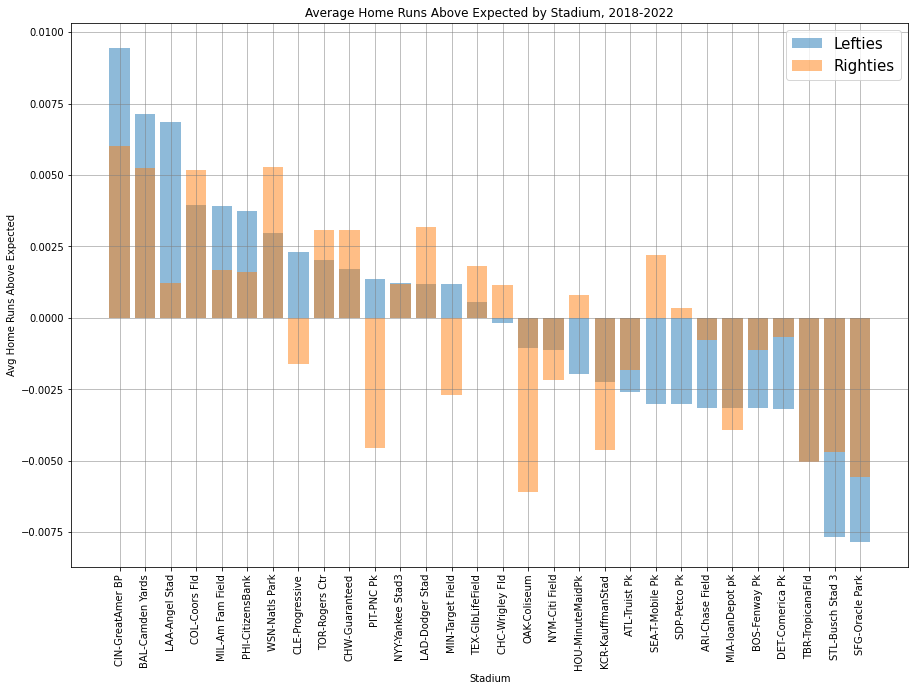

In [ ]:
# plot avg HRs above expected, overlay RHH and LHH
fig = plt.figure(figsize=(15, 10))
ax=fig.add_subplot()
ax.bar(x=LHH_HR_above_exp.index,height=LHH_HR_above_exp.values, alpha=0.5, label='Lefties')
ax.bar(x=RHH_HR_above_exp.index,height=RHH_HR_above_exp.values, alpha=0.5, label='Righties')
ax.grid(color='gray', linewidth=0.5)
plt.xlabel('Stadium'); plt.ylabel('Avg Home Runs Above Expected'); 
plt.title('Average Home Runs Above Expected by Stadium, 2018-2022')
plt.xticks(rotation=90)
plt.legend(fontsize=15);

Base on the plot above, lefties are at the greatest disadvantage at Oracle Park and at the greatest advantage at Great American Ballpark. One would think the disadvantage may hold true for righties as well, but that is not the case. Righties are at the greatest advantage at Great American as well, but they are at the greatest disadvantage at Oakland Coliseum.

Interestingly, both lefties and righties experience one of, if not the, greatest disadvantages at Oracle Park.

In [13]:
%%shell
jupyter nbconvert --to html /content/MLB_Stadium_Analysis.ipynb

[NbConvertApp] Converting notebook /content/MLB_Stadium_Analysis.ipynb to html
[NbConvertApp] Writing 807133 bytes to /content/MLB_Stadium_Analysis.html
